In [3]:
!conda install plotly -y
!conda install geopandas -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for libcurl libdap4 kealib tiledb gdal libnetcdf pyproj proj| ^C
                                                                               failed

CondaError: KeyboardInterrupt

- 

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
# import necessary libraries
from plotly.figure_factory._county_choropleth import create_choropleth

# Granger Causality Testing

In [6]:
from covid_activity.references import DATASET_DIR
with open(os.path.join(DATASET_DIR, 'full_policy_model.json'), 'r') as f:
    granger_casuality_county_results = json.loads(f.read())

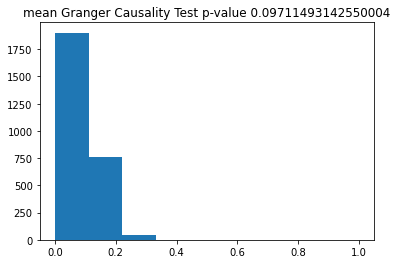

In [7]:
p_values = []
for county, result in granger_casuality_county_results.items():
    p_value = result['p_value']
    if str(p_value) != 'nan':
        p_values.append(p_value)
plt.title(f"mean Granger Causality Test p-value {np.mean(p_values)}")
plt.hist(p_values, bins=np.linspace(0,1, 10));

## Country Level Model by combining subnational units

In [8]:
full_model = np.zeros_like(result['full_model'])
reduced_model = np.zeros_like(result['reduced_model'])
weights = []
for county, result in granger_casuality_county_results.items():
    population_density = result['population_density']
    full_model += np.asarray(result['full_model']) * population_density
    reduced_model += np.asarray(result['reduced_model'])  * population_density
    weights.append(population_density)

full_model /= np.sum(weights)
reduced_model /= np.sum(weights)

In [9]:
from covid_activity.experiments.causality import GrangerCausalityTest
from covid_activity.dataset.dataset_constructor import CountyDataLake, compute_diffs
dlake = CountyDataLake()
cccpaap_masked = dlake.get_county_case_counts_pop_activity_landarea_policy()
cols = [
       'Accommodation',
       'Accommodation and Food Services',
       'Administrative and Support Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Agriculture, Forestry, Fishing and Hunting',
       'Ambulatory Health Care Services',
       'Amusement, Gambling, and Recreation Industries',
       'Arts, Entertainment, and Recreation',
       'Automotive Repair and Maintenance',
       'Building Material and Garden Equipment and Supplies Dealers',
       'Clothing and Clothing Accessories Stores',
       'Commercial and Industrial Machinery and Equipment (except Automotive and Electronic) Repair and Maintenance',
       'Construction', 'Construction of Buildings',
       'Credit Intermediation and Related Activities',
       'Death Care Services', 'Drycleaning and Laundry Services',
       'Educational Services', 'Fabricated Metal Product Manufacturing',
       'Finance and Insurance', 'Fishing, Hunting and Trapping',
       'Food Manufacturing', 'Food Services and Drinking Places',
       'Food and Beverage Stores', 'Forestry and Logging',
       'Furniture and Home Furnishings Stores',
       'Furniture and Related Product Manufacturing', 'Gasoline Stations',
       'General Merchandise Stores', 'Health Care and Social Assistance',
       'Health and Personal Care Stores',
       'Heavy and Civil Engineering Construction',
       'Independent Artists, Writers, and Performers',
       'Industries not classified', 'Information',
       'Insurance Carriers and Related Activities',
       'Machinery Manufacturing',
       'Management of Companies and Enterprises', 'Manufacturing',
       'Merchant Wholesalers, Durable Goods',
       'Merchant Wholesalers, Nondurable Goods',
       'Mining, Quarrying, and Oil and Gas Extraction',
       'Miscellaneous Manufacturing', 'Miscellaneous Store Retailers',
       'Motor Vehicle and Parts Dealers',
       'Nonmetallic Mineral Product Manufacturing', 'Nonstore Retailers',
       'Nursing and Residential Care Facilities',
       'Other Information Services', 'Other Personal Services',
       'Other Services (except Public Administration)',
       'Performing Arts Companies',
       'Performing Arts, Spectator Sports, and Related Industries',
       'Personal Care Services',
       'Personal and Household Goods Repair and Maintenance',
       'Personal and Laundry Services',
       'Plastics and Rubber Products Manufacturing',
       'Primary Metal Manufacturing',
       'Printing and Related Support Activities',
       'Professional, Scientific, and Technical Services',
       'Publishing Industries (except Internet)', 'Real Estate',
       'Real Estate and Rental and Leasing', 'Religious Organizations',
       'Religious, Grantmaking, Civic, Professional, and Similar Organizations',
       'Rental and Leasing Services', 'Repair and Maintenance',
       'Restaurants and Other Eating Places', 'Retail Trade',
       'Securities, Commodity Contracts, and Other Financial Investments and Related Activities',
       'Social Assistance', 'Special Food Services',
       'Specialty Trade Contractors', 'Spectator Sports',
       'Sporting Goods, Hobby, Musical Instrument, and Book Stores',
       'Support Activities for Agriculture and Forestry',
       'Support Activities for Transportation', 'Telecommunications',
       'Transit and Ground Passenger Transportation',
       'Transportation and Warehousing', 'Traveler Accommodation',
       'Truck Transportation', 'Utilities',
       'Wholesale Electronic Markets and Agents and Brokers',
       'Wholesale Trade', 'Wood Product Manufacturing', 'population_density',
        ]
cccpaap_masked = compute_diffs(cccpaap_masked)
print("Starting Test")
gct = GrangerCausalityTest(
            X = cccpaap_masked[cols],
            Y = cccpaap_masked[['daily_growth_rate']],
            x_lag = 1,
            y_lag = 5,
            dummy_variables = 0
        )
gct.full_model = full_model
gct.reduced_model = reduced_model
p_value = gct.F_test()

/usr/local/anaconda3/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

### Visualize distribution of P-values for each model

In [10]:
import plotly.figure_factory as ff

fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```